In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 01:24:16] [setup] RAM Tracking...
[codecarbon INFO @ 01:24:16] [setup] CPU Tracking...
[codecarbon WARNING @ 01:24:19] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 01:24:20] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 01:24:20] [setup] GPU Tracking...
[codecarbon INFO @ 01:24:20] No GPU found.
[codecarbon INFO @ 01:24:20] >>> Tracker's metadata:
[codecarbon INFO @ 01:24:20]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 01:24:20]   Python version: 3.9.12
[codecarbon INFO @ 01:24:20]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 01:24:20]   Available RAM : 8.000 GB
[codecarbon INFO @ 01:24:20]   CPU count: 8
[codecarbon INFO @ 01:24:20]   CPU model: Apple M1
[codecarbon INFO @ 01:24:20]   GPU count: None
[codecarbon INFO @ 01:24:20]   GPU model: None
[codecarbon INFO @ 01:24:24] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [4]:
import re

def extraer_info_mejorada(ruta):
    # Extrae con regex el patrón típico del final del nombre del archivo
    match = re.search(r'-([\d.]+)-(m|f)-(\d+)-', ruta)
    if match:
        # match.groups() devuelve (edad_raw, genero, edad_clasificada)
        edad_raw, genero, edad = match.groups()
        return genero, edad
    else:
        return None, None  # si no encuentra patrón, deja como None

df[['Genero', 'Edad_Codigo']] = df['Cry_Audio_File'].apply(lambda x: pd.Series(extraer_info_mejorada(x)))

df['Genero'] = df['Genero'].map({'m': 0, 'f': 1})

edad_map = {
    '04': 1,
    '48': 2,
    '26': 3,
    '72': 4,
    '22': 5
}

df['Edad'] = df['Edad_Codigo'].map(edad_map)

df.drop(columns=['Cry_Audio_File', 'Edad_Codigo'], inplace=True)

In [5]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
col_names = df.columns

col_names

Index(['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean',
       'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean',
       'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2',
       'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9',
       'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13', 'Genero', 'Edad'],
      dtype='object')

In [7]:
X = df.drop(['Cry_Reason'], axis=1)

y = df['Cry_Reason']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
cols = X_train.columns

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [11]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [12]:
X_test = pd.DataFrame(X_test, columns=[cols])


MODELO

In [13]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

In [15]:
# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: {class_report}")

Classification Report:               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.90      0.90      0.90        79
           4       0.00      0.00      0.00         6

    accuracy                           0.79        92
   macro avg       0.31      0.26      0.28        92
weighted avg       0.81      0.79      0.80        92



CV para encontrar los mejores parámetros

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir los parámetros a probar
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Crear el modelo base
mlp = MLPClassifier(max_iter=1000, random_state=42)

# GridSearch con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,     # Usa todos los núcleos disponibles
                           verbose=2)

# Entrenar
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

# Evaluar en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en test set: {test_accuracy:.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/ana

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alp

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/ana

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   3.0

[codecarbon INFO @ 01:24:39] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:24:39] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:24:39] 0.000033 kWh of electricity used since the beginning.


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total t

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adapti

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/ana

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, 

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.7s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   2.5s
[CV] EN

[codecarbon INFO @ 01:24:54] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:24:54] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:24:54] 0.000067 kWh of electricity used since the beginning.


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, so

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.0s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activ

[codecarbon INFO @ 01:25:09] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:25:09] Energy consumed for all CPUs : 0.000062 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:25:09] 0.000100 kWh of electricity used since the beginning.


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.7s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.7s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s


[codecarbon INFO @ 01:25:24] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:25:24] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:25:24] 0.000133 kWh of electricity used since the beginning.
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.7s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/ana

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.6s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.6s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   5.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   5.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.6s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[codecarbon INFO @ 01:25:39] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:25:39] Energy consumed for all CPUs : 0.000104 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:25:39] 0.000167 kWh of electricity used since the beginning.


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.4s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.2s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   1.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.6s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.5s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=   2.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   0.1s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.3s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.

[codecarbon INFO @ 01:25:54] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:25:54] Energy consumed for all CPUs : 0.000125 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:25:54] 0.000200 kWh of electricity used since the beginning.
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.8s


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.9s[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s



/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; tota

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 2

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solve

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo con los mejores parámetros encontrados
final_mlp = MLPClassifier(hidden_layer_sizes=(64,),
                          activation='relu',
                          solver='sgd',
                          alpha=0.0001,
                          learning_rate='constant',
                          max_iter=2000,          # un poco más alto por si no converge
                          momentum=0.9,           # mejora con SGD
                          random_state=42)

# Entrenar el modelo
final_mlp.fit(X_train, y_train)

# Predecir
y_pred = final_mlp.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en test con el modelo final: {accuracy:.4f}")


Accuracy en test con el modelo final: 0.8587


In [19]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Predicciones
y_pred = final_mlp.predict(X_test)
y_proba = final_mlp.predict_proba(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')     # Sensibilidad ponderada
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

# Mostrar resultados
print(f"Accuracy:      {accuracy:.4f}")
print(f"Sensibilidad:  {recall:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"AUC (weighted): {auc:.4f}")




Accuracy:      0.8587
Sensibilidad:  0.8587
F1 Score:      0.7934
AUC (weighted): 0.7268


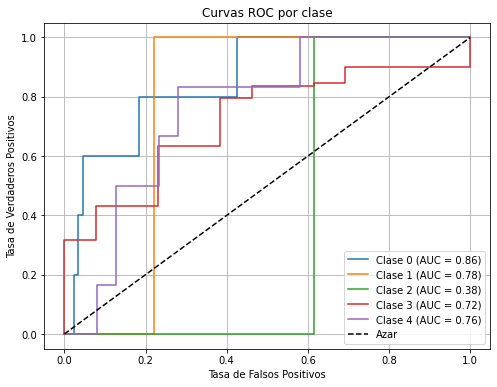

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Asegúrate de tener clases codificadas como números (0, 1, 2, ...)
classes = np.unique(y_test)
n_classes = len(classes)

# Binarizar las etiquetas para multiclase
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = final_mlp.predict_proba(X_test)

# Calcular curva ROC y AUC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Azar')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por clase')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 432x432 with 0 Axes>

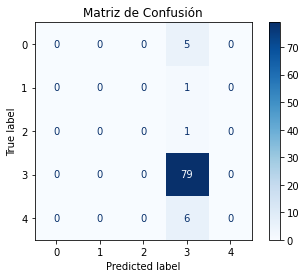

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones
y_pred = final_mlp.predict(X_test)

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión')
plt.grid(False)
plt.show()


Let's try SMOTE for imbalanced classes

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Separar en train/test (si no lo habías hecho ya)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)  # Muy importante: mantener distribución por clase

# 2. Aplicar SMOTE solo sobre los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificación
from collections import Counter
print("Distribución de clases antes del SMOTE:", Counter(y_train))
print("Distribución de clases después del SMOTE:", Counter(y_train_smote))


Distribución de clases antes del SMOTE: Counter({3: 305, 2: 22, 4: 19, 0: 13, 1: 6})
Distribución de clases después del SMOTE: Counter({2: 305, 3: 305, 4: 305, 0: 305, 1: 305})


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

mlp_smote = MLPClassifier(hidden_layer_sizes=(64,),
                          activation='relu',
                          solver='sgd',
                          alpha=0.0001,
                          learning_rate='constant',
                          max_iter=2000,
                          momentum=0.9,
                          random_state=42)

# Entrenar con datos balanceados
mlp_smote.fit(X_train_smote, y_train_smote)

# Evaluar con el test original (sin rebalancear)
y_pred = mlp_smote.predict(X_test)
y_proba = mlp_smote.predict_proba(X_test)

# Métricas (ahora weighted)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

print(f"Accuracy:      {accuracy:.4f}")
print(f"Sensibilidad:  {recall:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"AUC (weighted): {auc:.4f}")



Accuracy:      0.0870
Sensibilidad:  0.0870
F1 Score:      0.1206
AUC (weighted): 0.5128


MLP no gestiona bien el desbalance de clases, ni siquiera con oversampling.

In [24]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 01:26:06] Energy consumed for RAM : 0.000085 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 01:26:06] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 01:26:06] 0.000228 kWh of electricity used since the beginning.


4.6754110766703034e-05